# Análise de Dados do CAGED - Vale do Paraíba

Uma análise dos dados de emprego e desemprego, usando a base de dados do CAGED

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
valeCities = {350850:"Sp-Cacapava",352020:"Sp-Igarata",352440:"Sp-Jacarei",352490:"Sp-Jambeiro",353170:"Sp-Monteiro Lobato",353560:"Sp-Paraibuna",354600:"Sp-Santa Branca",354990:"Sp-Sao Jose dos Campos",350970:"Sp-Campos do Jordao",352630:"Sp-Lagoinha",353230:"Sp-Natividade da Serra",353800:"Sp-Pindamonhangaba",354230:"Sp-Redencao da Serra",354820:"Sp-Santo Antonio do Pinhal",354860:"Sp-Sao Bento do Sapucai",355000:"Sp-Sao Luis do Paraitinga",355410:"Sp-Taubate",355480:"Sp-Tremembe",350250:"Sp-Aparecida",350860:"Sp-Cachoeira Paulista",350995:"Sp-Canas",351360:"Sp-Cunha",351840:"Sp-Guaratingueta",352720:"Sp-Lorena",353850:"Sp-Piquete",354075:"Sp-Potim",354430:"Sp-Roseira",350315:"Sp-Arapei",350350:"Sp-Areias",350490:"Sp-Bananal",351340:"Sp-Cruzeiro",352660:"Sp-Lavrinhas",354190:"Sp-Queluz",354960:"Sp-Sao Jose do Barreiro",355200:"Sp-Silveiras",351050:"Sp-Caraguatatuba",352040:"Sp-Ilhabela",355070:"Sp-Sao Sebastiao",355540:"Sp-Ubatuba"}
sections = {"A":"Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura","B":"Indústrias Extrativas","C":"Indústrias de Transformação","D":"Eletricidade e Gás","E":"Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação","F":"Construção","G":"Comércio, Reparação de Veículos Automotores e Motocicletas","H":"Transporte, Armazenagem e Correio","I":"Alojamento e Alimentação","J":"Informação e Comunicação","K":"Atividades Financeiras, de Seguros e Serviços Relacionados","L":"Atividades Imobiliárias","M":"Atividades Profissionais, Científicas e Técnicas","N":"Atividades Administrativas e Serviços Complementares","O":"Administração Pública, Defesa e Seguridade Social","P":"Educação","Q":"Saúde Humana e Serviços Sociais","R":"Artes, Cultura, Esporte e Recreação","S":"Outras Atividades de Serviços","T":"Serviços Domésticos","U":"Organismos Internacionais e Outras Instituições Extraterritoriais","Z":"Não identificado"}
instructions = {1:"Analfabeto",2:"Até 5ª Incompleto",3:"5ª Completo Fundamental",4:"6ª a 9ª Fundamental",5:"Fundamental Completo",6:"Médio Incompleto",7:"Médio Completo",8:"Superior Incompleto",9:"Superior Completo",10:"Mestrado",11:"Doutorado",80:"Pós-Graduação completa",99:"Não Identificado"}
sexo = {1:"M",3:"F",9:"Não Identificado"}
raçacor = {1:"Branca",2:"Preta",3:"Parda",4:"Amarela",5:"Indígena",6:"Não informada",9:"Não Identificado"}
tipoempregador = {0:"CNPJ RAIZ",2:"CPF",9:"Não Identificado"}
tipomovimentação = {10:"Admissão por Primeiro Emprego",20:"Admissão por Reemprego",25:"Admissão por contrato trabalho prazo determinado",31:"Desligamento por demissão sem justa causa",32:"Desligamento por demissão com justa causa",33:"Desligamento por Culpa Recíproca",35:"Admissão por Reintegração",40:"Desligamento a pedido",43:"Desligamento por prazo determinado",45:"Desligamento por término de contrato",50:"Desligamento por aposentadoria",60:"Desligamento por morte",70:"Admissão por transferência",80:"Desligamento por transferência",90:"Desligamento por Acordo entre empregado e empregador",98:"Desligamento de Tipo Ignorado",99:"Não Identificado"}
tiporesumo = {10:"Admissão",20:"Admissão",25:"Admissão",31:"Desligamento",32:"Desligamento",33:"Desligamento",35:"Admissão",40:"Desligamento",43:"Desligamento",45:"Desligamento",50:"Desligamento",60:"Desligamento",70:"Admissão",80:"Desligamento",90:"Desligamento",98:"Desligamento",99:"Não Identificado"}

In [3]:
def valefy(mes):
    mes = mes.where((mes["município"]).isin(valeCities.keys())).dropna()
    mes = mes.drop(columns=['região','uf','subclasse','saldomovimentação','cbo2002ocupação','categoria','tipoestabelecimento','tipodedeficiência','indtrabintermitente','horascontratuais','tamestabjan','indicadoraprendiz','fonte','competência','indtrabparcial'])
    mes["município"] = mes["município"].map(valeCities)
    mes["seção"] = mes["seção"].map(sections)
    mes["graudeinstrução"] = mes["graudeinstrução"].map(instructions)
    mes["sexo"] = mes["sexo"].map(sexo)
    mes["raçacor"] = mes["raçacor"].map(raçacor)
    mes["tipoempregador"] = mes["tipoempregador"].map(tipoempregador)
    mes["tiporesumo"] = mes["tipomovimentação"].map(tiporesumo)
    mes["tipomovimentação"] = mes["tipomovimentação"].map(tipomovimentação)
    return mes

In [4]:
jan2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202001.txt",delimiter=';', encoding='utf-8'))
fev2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202002.txt",delimiter=';', encoding='utf-8'))
mar2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202003.txt",delimiter=';', encoding='utf-8'))
abr2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202004.txt",delimiter=';', encoding='utf-8'))
mai2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202005.txt",delimiter=';', encoding='utf-8'))
jun2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202006.txt",delimiter=';', encoding='utf-8'))
jul2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202007.txt",delimiter=';', encoding='utf-8'))
ago2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202008.txt",delimiter=';', encoding='utf-8'))
set2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202009.txt",delimiter=';', encoding='utf-8'))
out2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202010.txt",delimiter=';', encoding='utf-8'))
nov2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202011.txt",delimiter=';', encoding='utf-8'))
dez2020 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202012.txt",delimiter=';', encoding='utf-8'))
jan2021 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202101.txt",delimiter=';', encoding='utf-8'))
fev2021 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202102.txt",delimiter=';', encoding='utf-8'))
mar2021 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202103.txt",delimiter=';', encoding='utf-8'))
abr2021 = valefy(pd.read_csv("./Aaaa/CAGEDMOV202104.txt",delimiter=';', encoding='utf-8'))

In [5]:
quarentena = [jan2020, fev2020, mar2020, abr2020, mai2020, jun2020, jul2020, ago2020, set2020, out2020, nov2020, dez2020, jan2021, fev2021, mar2021, abr2021]
quarentenaadmin = []
quarentenadesl = []
quarentenanomes = ["Jan 2020", "Fev 2020", "Mar 2020", "Abr 2020", "Mai 2020", "Jun 2020", "Jul 2020", "Ago 2020", "Set 2020", "Out 2020", "Nov 2020", "Dez 2020", "Jan 2021", "Fev 2021", "Mar 2021", "Abr 2021"]

In [6]:
quarentena[4].sample(10)

,município,seção,graudeinstrução,idade,raçacor,sexo,tipoempregador,tipomovimentação,salário,tiporesumo
1476699,Sp-Sao Sebastiao,"Comércio, Reparação de Veículos Automotores e ...",Fundamental Completo,31.0,Parda,M,CNPJ RAIZ,Desligamento por demissão sem justa causa,1483.000000,Desligamento
531841,Sp-Aparecida,Informação e Comunicação,Superior Completo,30.0,Branca,F,CNPJ RAIZ,Desligamento por demissão sem justa causa,1718.939941,Desligamento
842054,Sp-Lorena,Educação,Médio Completo,46.0,Branca,F,CNPJ RAIZ,Desligamento por demissão sem justa causa,1510.719971,Desligamento
797861,Sp-Jacarei,"Comércio, Reparação de Veículos Automotores e ...",Médio Completo,21.0,Branca,M,CNPJ RAIZ,Admissão por Reemprego,1458.599976,Admissão
1468003,Sp-Sao Jose dos Campos,Atividades Administrativas e Serviços Compleme...,Médio Completo,29.0,Preta,M,CNPJ RAIZ,Desligamento por demissão sem justa causa,1392.020020,Desligamento
525887,Sp-Jacarei,"Comércio, Reparação de Veículos Automotores e ...",Médio Completo,40.0,Parda,F,CNPJ RAIZ,Admissão por Reemprego,1600.000000,Admissão
408185,Sp-Sao Jose dos Campos,"Atividades Profissionais, Científicas e Técnicas",Superior Completo,60.0,Branca,M,CNPJ RAIZ,Admissão por Reemprego,1980.000000,Admissão
1071613,Sp-Sao Jose dos Campos,"Comércio, Reparação de Veículos Automotores e ...",Fundamental Completo,40.0,Branca,M,CNPJ RAIZ,Admissão por Reemprego,1836.670044,Admissão
695886,Sp-Sao Jose dos Campos,"Comércio, Reparação de Veículos Automotores e ...",Médio Incompleto,55.0,Branca,M,CNPJ RAIZ,Desligamento por demissão sem justa causa,1791.199951,Desligamento
1623446,Sp-Sao Jose dos Campos,Atividades Administrativas e Serviços Compleme...,6ª a 9ª Fundamental,52.0,Indígena,M,CNPJ RAIZ,Admissão por Reemprego,1052.760010,Admissão


In [7]:
def filtrar(mes, col, prompt):
    return mes.where(mes[col]==prompt).dropna()

In [8]:
for mes in quarentena:
    quarentenaadmin.append(filtrar(mes, "tiporesumo", "Admissão")) 
    quarentenadesl.append(filtrar(mes, "tiporesumo", "Desligamento"))

In [9]:
quarentenaadmin[0].sample()

,município,seção,graudeinstrução,idade,raçacor,sexo,tipoempregador,tipomovimentação,salário,tiporesumo
2828238,Sp-Jambeiro,Indústrias de Transformação,Médio Completo,34.0,Preta,M,CNPJ RAIZ,Admissão por Reemprego,11220.0,Admissão


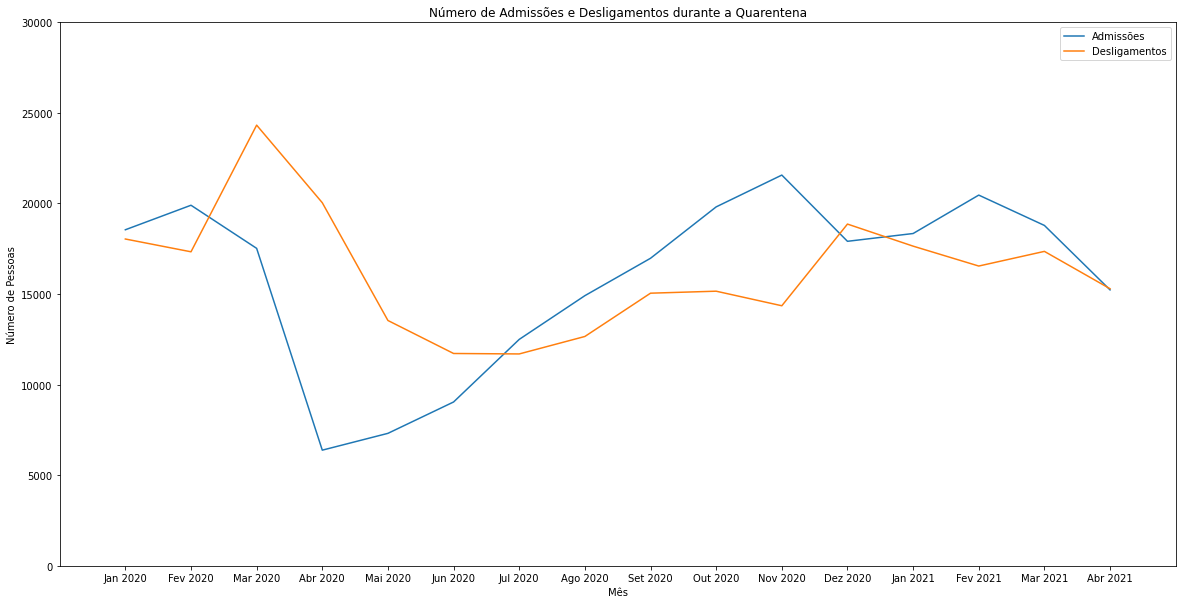

In [10]:
admins = []
desls = []
for mes in quarentenaadmin:
    admins.append(len(mes.index))
for mes in quarentenadesl:
    desls.append(len(mes.index))
    

fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,30000])
plt.title("Número de Admissões e Desligamentos durante a Quarentena")

plt.plot(quarentenanomes, admins, label="Admissões")
plt.plot(quarentenanomes, desls, label="Desligamentos")
plt.legend()

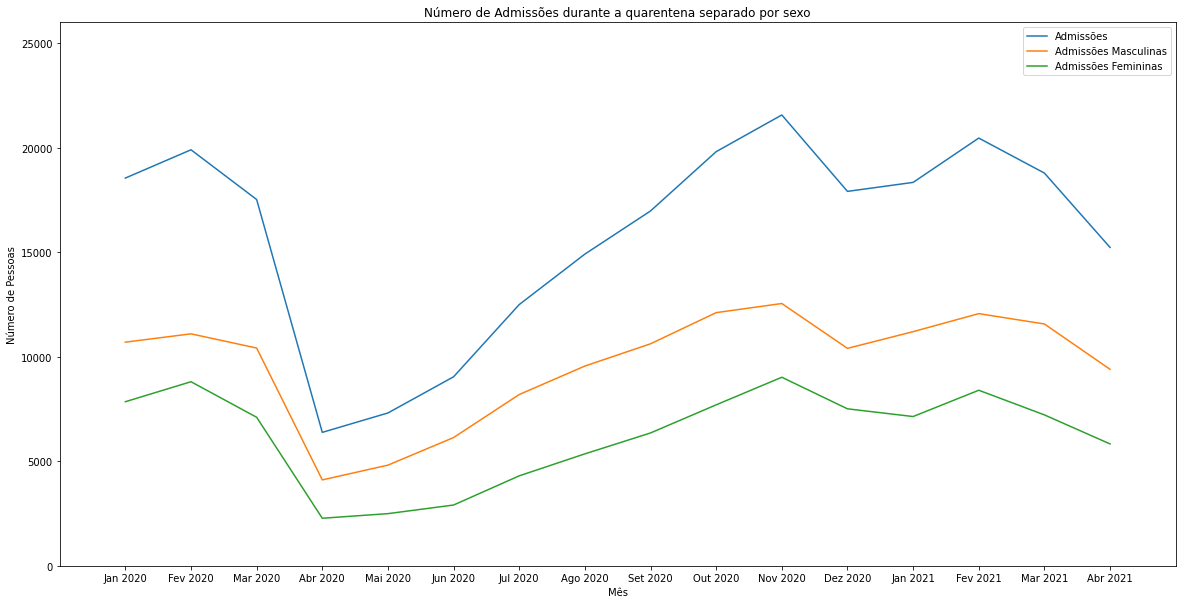

In [11]:
madmins = []
fadmins = []
for mes in quarentenaadmin:
    madmins.append(len(filtrar(mes,"sexo","M").index))
    fadmins.append(len(filtrar(mes,"sexo","F").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,26000])
plt.title("Número de Admissões durante a quarentena separado por sexo")

plt.plot(quarentenanomes, admins, label="Admissões")
plt.plot(quarentenanomes, madmins, label="Admissões Masculinas")
plt.plot(quarentenanomes, fadmins, label="Admissões Femininas")
plt.legend()

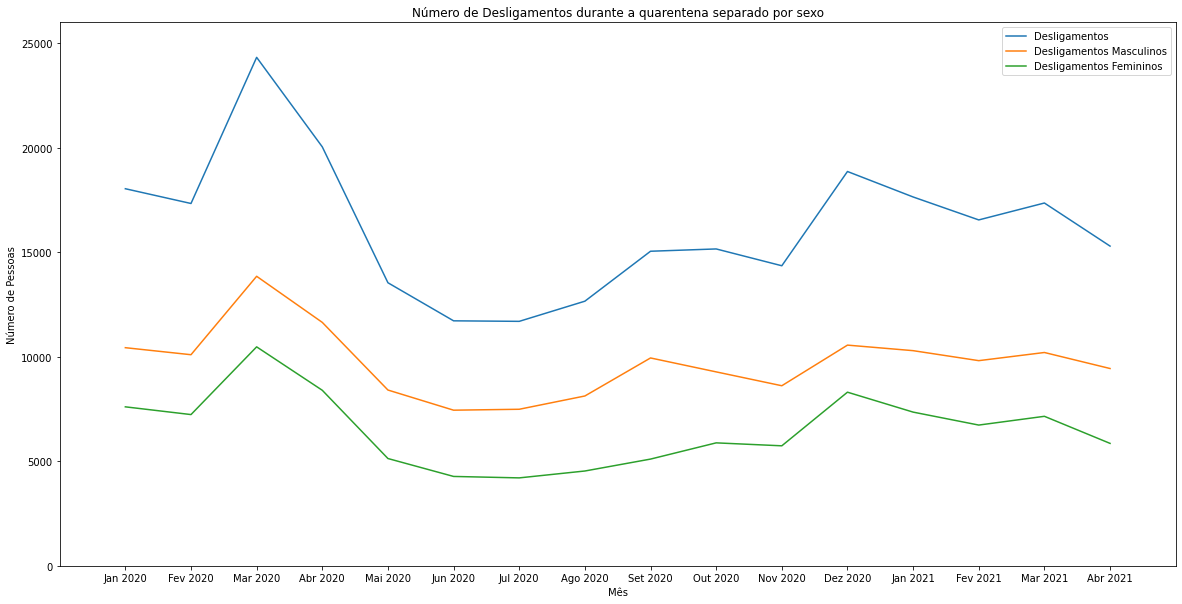

In [12]:
mdesls = []
fdesls = []
for mes in quarentenadesl:
    mdesls.append(len(filtrar(mes,"sexo","M").index))
    fdesls.append(len(filtrar(mes,"sexo","F").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,26000])
plt.title("Número de Desligamentos durante a quarentena separado por sexo")

plt.plot(quarentenanomes, desls, label="Desligamentos")
plt.plot(quarentenanomes, mdesls, label="Desligamentos Masculinos")
plt.plot(quarentenanomes, fdesls, label="Desligamentos Femininos")
plt.legend()

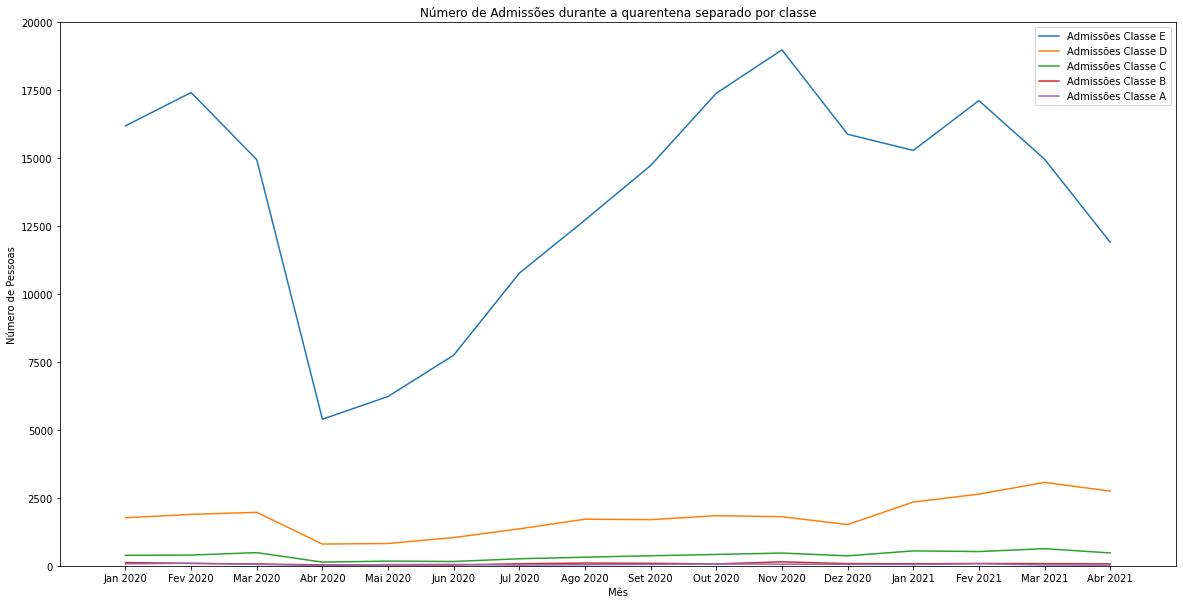

In [13]:
eadmins = []
dadmins = []
cadmins = []
badmins = []
aadmins = []
for mes in quarentenaadmin:
    eadmins.append(len(mes.where((mes["salário"])<2090).dropna().index))
    dadmins.append(len(mes.where(mes["salário"]<4180).dropna().where(mes["salário"]>2090).dropna().index))
    cadmins.append(len(mes.where(mes["salário"]<10450).dropna().where(mes["salário"]>4180).dropna().index))
    badmins.append(len(mes.where(mes["salário"]<20900).dropna().where(mes["salário"]>10450).dropna().index))
    aadmins.append(len(mes.where((mes["salário"])>20900).dropna().index))
    
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,20000])
plt.title("Número de Admissões durante a quarentena separado por classe")

plt.plot(quarentenanomes, eadmins, label="Admissões Classe E")
plt.plot(quarentenanomes, dadmins, label="Admissões Classe D")
plt.plot(quarentenanomes, cadmins, label="Admissões Classe C")
plt.plot(quarentenanomes, badmins, label="Admissões Classe B")
plt.plot(quarentenanomes, aadmins, label="Admissões Classe A")
plt.legend()

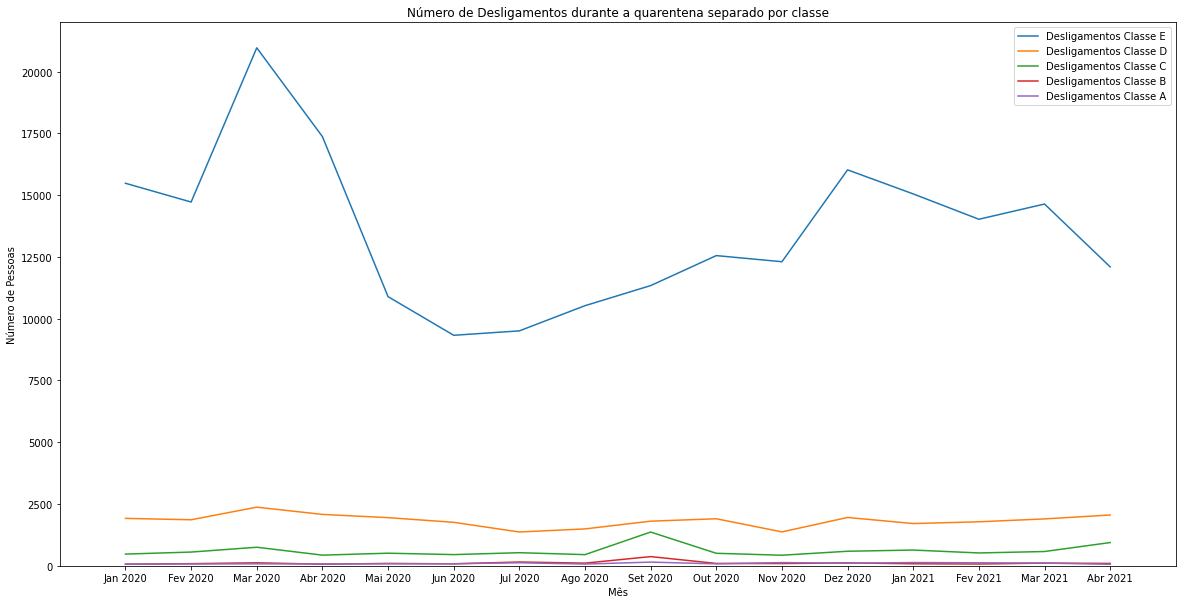

In [15]:
edesls = []
ddesls = []
cdesls = []
bdesls = []
adesls = []
for mes in quarentenadesl:
    edesls.append(len(mes.where((mes["salário"])<2090).dropna().index))
    ddesls.append(len(mes.where(mes["salário"]<4180).dropna().where(mes["salário"]>2090).dropna().index))
    cdesls.append(len(mes.where(mes["salário"]<10450).dropna().where(mes["salário"]>4180).dropna().index))
    bdesls.append(len(mes.where(mes["salário"]<20900).dropna().where(mes["salário"]>10450).dropna().index))
    adesls.append(len(mes.where((mes["salário"])>20900).dropna().index))
    
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,22000])
plt.title("Número de Desligamentos durante a quarentena separado por classe")

plt.plot(quarentenanomes, edesls, label="Desligamentos Classe E")
plt.plot(quarentenanomes, ddesls, label="Desligamentos Classe D")
plt.plot(quarentenanomes, cdesls, label="Desligamentos Classe C")
plt.plot(quarentenanomes, bdesls, label="Desligamentos Classe B")
plt.plot(quarentenanomes, adesls, label="Desligamentos Classe A")
plt.legend()

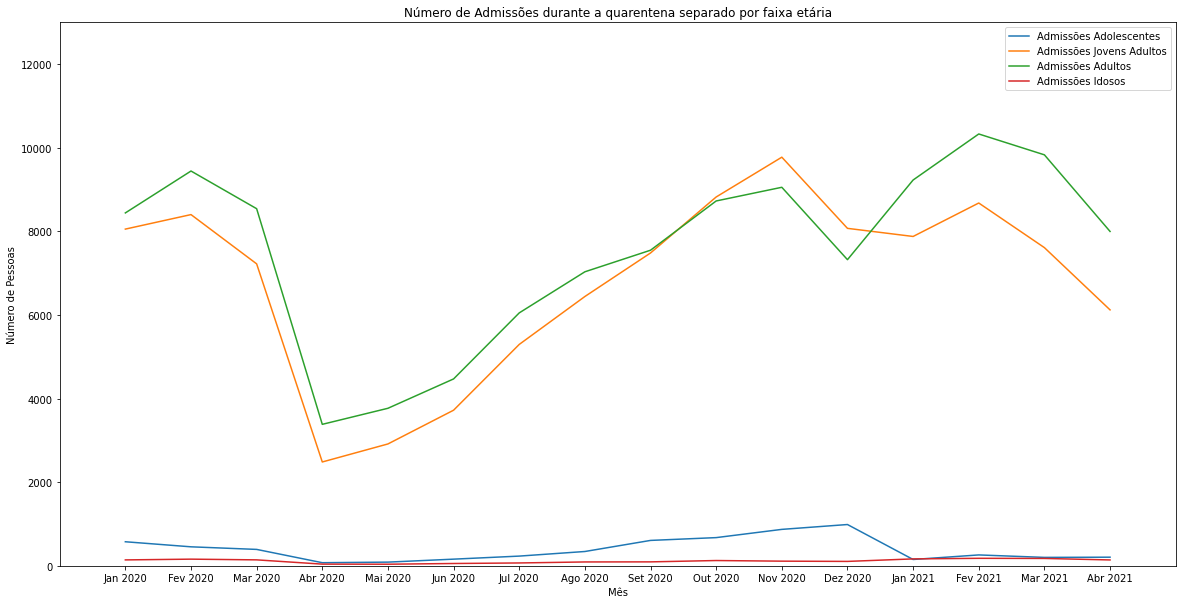

In [17]:
tadmins = []
jaadmins = []
vaadmins = []
idadmins = []
for mes in quarentenaadmin:
    tadmins.append(len(mes.where((mes["idade"])<18).dropna().index))
    jaadmins.append(len(mes.where(mes["idade"]<30).dropna().where(mes["idade"]>18).dropna().index))
    vaadmins.append(len(mes.where(mes["idade"]<60).dropna().where(mes["idade"]>30).dropna().index))
    idadmins.append(len(mes.where((mes["idade"])>60).dropna().index))
    
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,13000])
plt.title("Número de Admissões durante a quarentena separado por faixa etária")

plt.plot(quarentenanomes, tadmins, label="Admissões Adolescentes")
plt.plot(quarentenanomes, jaadmins, label="Admissões Jovens Adultos")
plt.plot(quarentenanomes, vaadmins, label="Admissões Adultos")
plt.plot(quarentenanomes, idadmins, label="Admissões Idosos")
plt.legend()

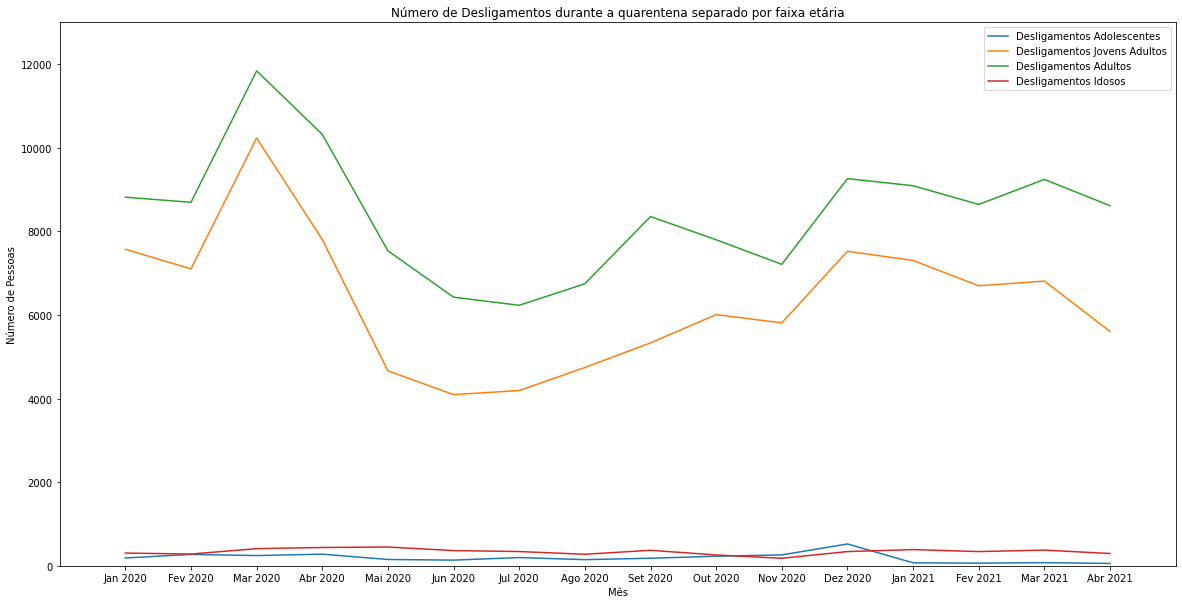

In [18]:
tdesls = []
jadesls = []
vadesls = []
iddesls = []
for mes in quarentenadesl:
    tdesls.append(len(mes.where((mes["idade"])<18).dropna().index))
    jadesls.append(len(mes.where(mes["idade"]<30).dropna().where(mes["idade"]>18).dropna().index))
    vadesls.append(len(mes.where(mes["idade"]<60).dropna().where(mes["idade"]>30).dropna().index))
    iddesls.append(len(mes.where((mes["idade"])>60).dropna().index))
    
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,13000])
plt.title("Número de Desligamentos durante a quarentena separado por faixa etária")

plt.plot(quarentenanomes, tdesls, label="Desligamentos Adolescentes")
plt.plot(quarentenanomes, jadesls, label="Desligamentos Jovens Adultos")
plt.plot(quarentenanomes, vadesls, label="Desligamentos Adultos")
plt.plot(quarentenanomes, iddesls, label="Desligamentos Idosos")
plt.legend()

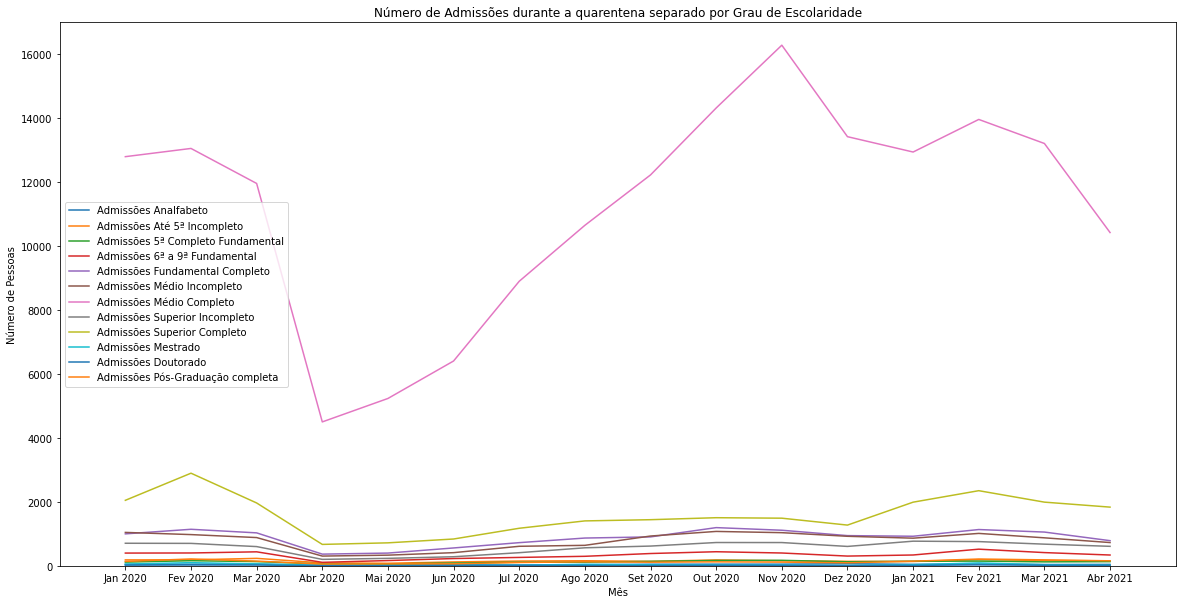

In [20]:
gadmins=[[],[],[],[],[],[],[],[],[],[],[],[]]
for mes in quarentenaadmin:
    gadmins[0].append(len(filtrar(mes,"graudeinstrução","Analfabeto").index))
    gadmins[1].append(len(filtrar(mes,"graudeinstrução","Até 5ª Incompleto").index))
    gadmins[2].append(len(filtrar(mes,"graudeinstrução","5ª Completo Fundamental").index))
    gadmins[3].append(len(filtrar(mes,"graudeinstrução","6ª a 9ª Fundamental").index))
    gadmins[4].append(len(filtrar(mes,"graudeinstrução","Fundamental Completo").index))
    gadmins[5].append(len(filtrar(mes,"graudeinstrução","Médio Incompleto").index))
    gadmins[6].append(len(filtrar(mes,"graudeinstrução","Médio Completo").index))
    gadmins[7].append(len(filtrar(mes,"graudeinstrução","Superior Incompleto").index))
    gadmins[8].append(len(filtrar(mes,"graudeinstrução","Superior Completo").index))
    gadmins[9].append(len(filtrar(mes,"graudeinstrução","Mestrado").index))
    gadmins[10].append(len(filtrar(mes,"graudeinstrução","Doutorado").index))
    gadmins[11].append(len(filtrar(mes,"graudeinstrução","Pós-Graduação completa").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,17000])
plt.title("Número de Admissões durante a quarentena separado por Grau de Escolaridade")

plt.plot(quarentenanomes, gadmins[0], label="Admissões Analfabeto")
plt.plot(quarentenanomes, gadmins[1], label="Admissões Até 5ª Incompleto")
plt.plot(quarentenanomes, gadmins[2], label="Admissões 5ª Completo Fundamental")
plt.plot(quarentenanomes, gadmins[3], label="Admissões 6ª a 9ª Fundamental")
plt.plot(quarentenanomes, gadmins[4], label="Admissões Fundamental Completo")
plt.plot(quarentenanomes, gadmins[5], label="Admissões Médio Incompleto")
plt.plot(quarentenanomes, gadmins[6], label="Admissões Médio Completo")
plt.plot(quarentenanomes, gadmins[7], label="Admissões Superior Incompleto")
plt.plot(quarentenanomes, gadmins[8], label="Admissões Superior Completo")
plt.plot(quarentenanomes, gadmins[9], label="Admissões Mestrado")
plt.plot(quarentenanomes, gadmins[10], label="Admissões Doutorado")
plt.plot(quarentenanomes, gadmins[11], label="Admissões Pós-Graduação completa")
plt.legend()

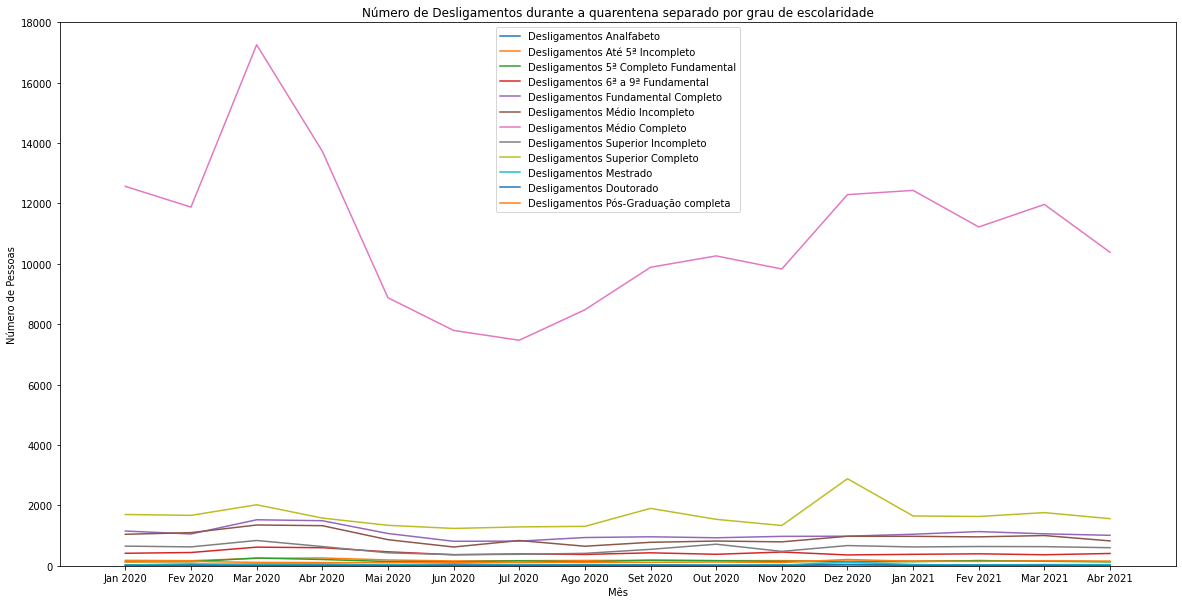

In [21]:
gdesls=[[],[],[],[],[],[],[],[],[],[],[],[]]
for mes in quarentenadesl:
    gdesls[0].append(len(filtrar(mes,"graudeinstrução","Analfabeto").index))
    gdesls[1].append(len(filtrar(mes,"graudeinstrução","Até 5ª Incompleto").index))
    gdesls[2].append(len(filtrar(mes,"graudeinstrução","5ª Completo Fundamental").index))
    gdesls[3].append(len(filtrar(mes,"graudeinstrução","6ª a 9ª Fundamental").index))
    gdesls[4].append(len(filtrar(mes,"graudeinstrução","Fundamental Completo").index))
    gdesls[5].append(len(filtrar(mes,"graudeinstrução","Médio Incompleto").index))
    gdesls[6].append(len(filtrar(mes,"graudeinstrução","Médio Completo").index))
    gdesls[7].append(len(filtrar(mes,"graudeinstrução","Superior Incompleto").index))
    gdesls[8].append(len(filtrar(mes,"graudeinstrução","Superior Completo").index))
    gdesls[9].append(len(filtrar(mes,"graudeinstrução","Mestrado").index))
    gdesls[10].append(len(filtrar(mes,"graudeinstrução","Doutorado").index))
    gdesls[11].append(len(filtrar(mes,"graudeinstrução","Pós-Graduação completa").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,18000])
plt.title("Número de Desligamentos durante a quarentena separado por grau de escolaridade")

plt.plot(quarentenanomes, gdesls[0], label="Desligamentos Analfabeto")
plt.plot(quarentenanomes, gdesls[1], label="Desligamentos Até 5ª Incompleto")
plt.plot(quarentenanomes, gdesls[2], label="Desligamentos 5ª Completo Fundamental")
plt.plot(quarentenanomes, gdesls[3], label="Desligamentos 6ª a 9ª Fundamental")
plt.plot(quarentenanomes, gdesls[4], label="Desligamentos Fundamental Completo")
plt.plot(quarentenanomes, gdesls[5], label="Desligamentos Médio Incompleto")
plt.plot(quarentenanomes, gdesls[6], label="Desligamentos Médio Completo")
plt.plot(quarentenanomes, gdesls[7], label="Desligamentos Superior Incompleto")
plt.plot(quarentenanomes, gdesls[8], label="Desligamentos Superior Completo")
plt.plot(quarentenanomes, gdesls[9], label="Desligamentos Mestrado")
plt.plot(quarentenanomes, gdesls[10], label="Desligamentos Doutorado")
plt.plot(quarentenanomes, gdesls[11], label="Desligamentos Pós-Graduação completa")
plt.legend()

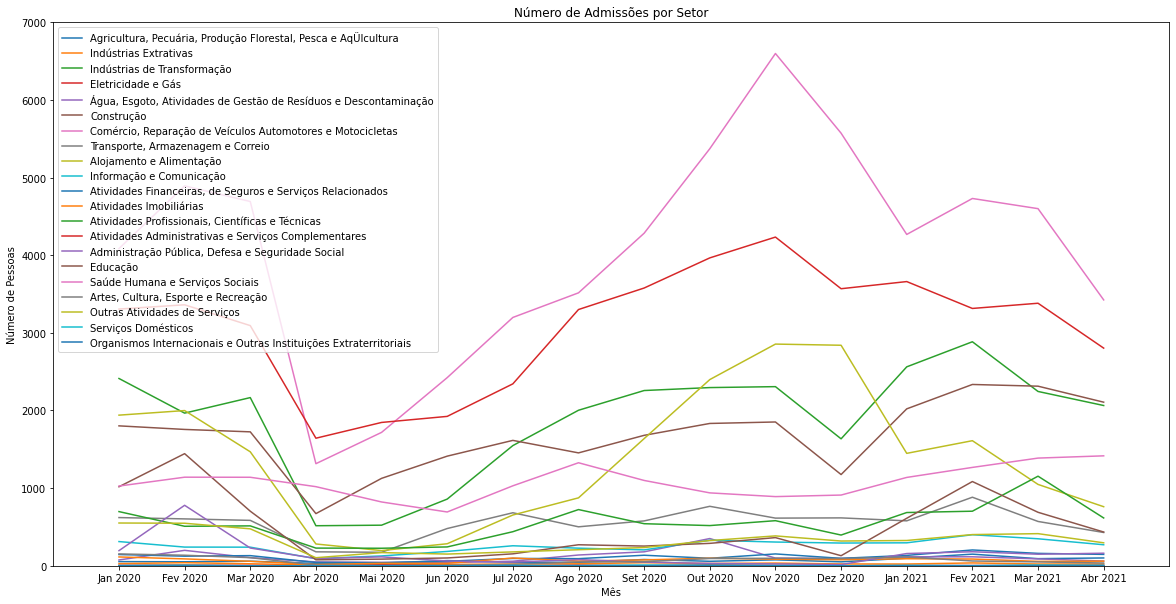

In [27]:
sadmins=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for mes in quarentenaadmin:
    sadmins[0].append(len(filtrar(mes,"seção","Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura").index))
    sadmins[1].append(len(filtrar(mes,"seção","Indústrias Extrativas").index))
    sadmins[2].append(len(filtrar(mes,"seção","Indústrias de Transformação").index))
    sadmins[3].append(len(filtrar(mes,"seção","Eletricidade e Gás").index))
    sadmins[4].append(len(filtrar(mes,"seção","Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação").index))
    sadmins[5].append(len(filtrar(mes,"seção","Construção").index))
    sadmins[6].append(len(filtrar(mes,"seção","Comércio, Reparação de Veículos Automotores e Motocicletas").index))
    sadmins[7].append(len(filtrar(mes,"seção","Transporte, Armazenagem e Correio").index))
    sadmins[8].append(len(filtrar(mes,"seção","Alojamento e Alimentação").index))
    sadmins[9].append(len(filtrar(mes,"seção","Informação e Comunicação").index))
    sadmins[10].append(len(filtrar(mes,"seção","Atividades Financeiras, de Seguros e Serviços Relacionados").index))
    sadmins[11].append(len(filtrar(mes,"seção","Atividades Imobiliárias").index))
    sadmins[12].append(len(filtrar(mes,"seção","Atividades Profissionais, Científicas e Técnicas").index))
    sadmins[13].append(len(filtrar(mes,"seção","Atividades Administrativas e Serviços Complementares").index))
    sadmins[14].append(len(filtrar(mes,"seção","Administração Pública, Defesa e Seguridade Social").index))
    sadmins[15].append(len(filtrar(mes,"seção","Educação").index))
    sadmins[16].append(len(filtrar(mes,"seção","Saúde Humana e Serviços Sociais").index))
    sadmins[17].append(len(filtrar(mes,"seção","Artes, Cultura, Esporte e Recreação").index))
    sadmins[18].append(len(filtrar(mes,"seção","Outras Atividades de Serviços").index))
    sadmins[19].append(len(filtrar(mes,"seção","Serviços Domésticos").index))
    sadmins[20].append(len(filtrar(mes,"seção","Organismos Internacionais e Outras Instituições Extraterritoriais").index))

fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,7000])
plt.title("Número de Admissões por Setor")

plt.plot(quarentenanomes, sadmins[0], label="Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura")
plt.plot(quarentenanomes, sadmins[1], label="Indústrias Extrativas")
plt.plot(quarentenanomes, sadmins[2], label="Indústrias de Transformação")
plt.plot(quarentenanomes, sadmins[3], label="Eletricidade e Gás")
plt.plot(quarentenanomes, sadmins[4], label="Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação")
plt.plot(quarentenanomes, sadmins[5], label="Construção")
plt.plot(quarentenanomes, sadmins[6], label="Comércio, Reparação de Veículos Automotores e Motocicletas")
plt.plot(quarentenanomes, sadmins[7], label="Transporte, Armazenagem e Correio")
plt.plot(quarentenanomes, sadmins[8], label="Alojamento e Alimentação")
plt.plot(quarentenanomes, sadmins[9], label="Informação e Comunicação")
plt.plot(quarentenanomes, sadmins[10], label="Atividades Financeiras, de Seguros e Serviços Relacionados")
plt.plot(quarentenanomes, sadmins[11], label="Atividades Imobiliárias")
plt.plot(quarentenanomes, sadmins[12], label="Atividades Profissionais, Científicas e Técnicas")
plt.plot(quarentenanomes, sadmins[13], label="Atividades Administrativas e Serviços Complementares")
plt.plot(quarentenanomes, sadmins[14], label="Administração Pública, Defesa e Seguridade Social")
plt.plot(quarentenanomes, sadmins[15], label="Educação")
plt.plot(quarentenanomes, sadmins[16], label="Saúde Humana e Serviços Sociais")
plt.plot(quarentenanomes, sadmins[17], label="Artes, Cultura, Esporte e Recreação")
plt.plot(quarentenanomes, sadmins[18], label="Outras Atividades de Serviços")
plt.plot(quarentenanomes, sadmins[19], label="Serviços Domésticos")
plt.plot(quarentenanomes, sadmins[20], label="Organismos Internacionais e Outras Instituições Extraterritoriais")
plt.legend()

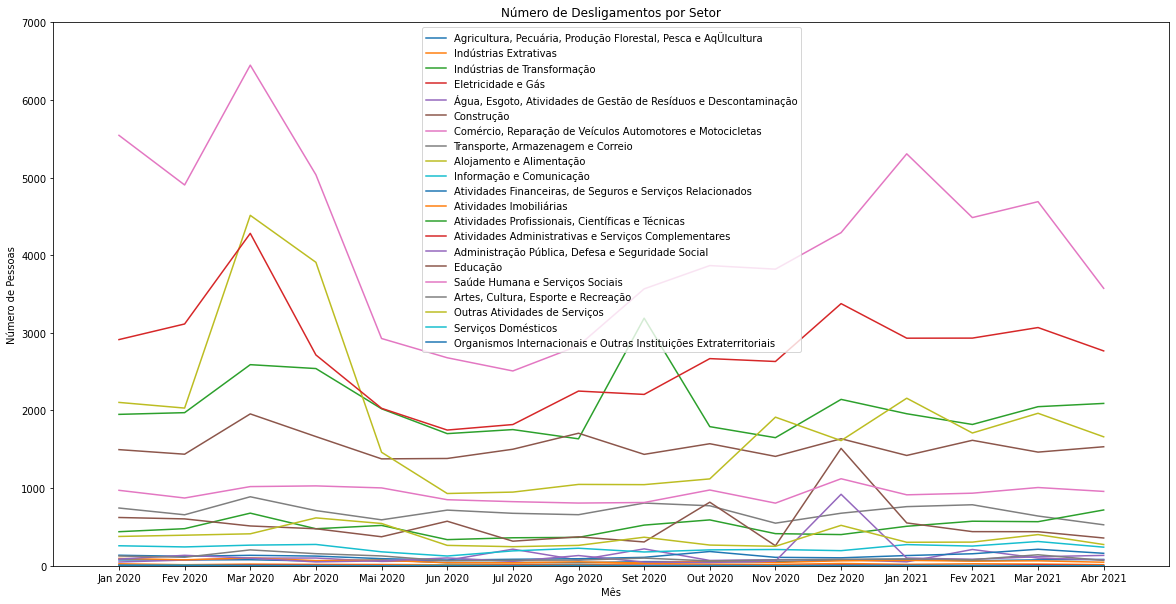

In [28]:
sdesls=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for mes in quarentenadesl:
    sdesls[0].append(len(filtrar(mes,"seção","Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura").index))
    sdesls[1].append(len(filtrar(mes,"seção","Indústrias Extrativas").index))
    sdesls[2].append(len(filtrar(mes,"seção","Indústrias de Transformação").index))
    sdesls[3].append(len(filtrar(mes,"seção","Eletricidade e Gás").index))
    sdesls[4].append(len(filtrar(mes,"seção","Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação").index))
    sdesls[5].append(len(filtrar(mes,"seção","Construção").index))
    sdesls[6].append(len(filtrar(mes,"seção","Comércio, Reparação de Veículos Automotores e Motocicletas").index))
    sdesls[7].append(len(filtrar(mes,"seção","Transporte, Armazenagem e Correio").index))
    sdesls[8].append(len(filtrar(mes,"seção","Alojamento e Alimentação").index))
    sdesls[9].append(len(filtrar(mes,"seção","Informação e Comunicação").index))
    sdesls[10].append(len(filtrar(mes,"seção","Atividades Financeiras, de Seguros e Serviços Relacionados").index))
    sdesls[11].append(len(filtrar(mes,"seção","Atividades Imobiliárias").index))
    sdesls[12].append(len(filtrar(mes,"seção","Atividades Profissionais, Científicas e Técnicas").index))
    sdesls[13].append(len(filtrar(mes,"seção","Atividades Administrativas e Serviços Complementares").index))
    sdesls[14].append(len(filtrar(mes,"seção","Administração Pública, Defesa e Seguridade Social").index))
    sdesls[15].append(len(filtrar(mes,"seção","Educação").index))
    sdesls[16].append(len(filtrar(mes,"seção","Saúde Humana e Serviços Sociais").index))
    sdesls[17].append(len(filtrar(mes,"seção","Artes, Cultura, Esporte e Recreação").index))
    sdesls[18].append(len(filtrar(mes,"seção","Outras Atividades de Serviços").index))
    sdesls[19].append(len(filtrar(mes,"seção","Serviços Domésticos").index))
    sdesls[20].append(len(filtrar(mes,"seção","Organismos Internacionais e Outras Instituições Extraterritoriais").index))

fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,7000])
plt.title("Número de Desligamentos por Setor")

plt.plot(quarentenanomes, sdesls[0], label="Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura")
plt.plot(quarentenanomes, sdesls[1], label="Indústrias Extrativas")
plt.plot(quarentenanomes, sdesls[2], label="Indústrias de Transformação")
plt.plot(quarentenanomes, sdesls[3], label="Eletricidade e Gás")
plt.plot(quarentenanomes, sdesls[4], label="Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação")
plt.plot(quarentenanomes, sdesls[5], label="Construção")
plt.plot(quarentenanomes, sdesls[6], label="Comércio, Reparação de Veículos Automotores e Motocicletas")
plt.plot(quarentenanomes, sdesls[7], label="Transporte, Armazenagem e Correio")
plt.plot(quarentenanomes, sdesls[8], label="Alojamento e Alimentação")
plt.plot(quarentenanomes, sdesls[9], label="Informação e Comunicação")
plt.plot(quarentenanomes, sdesls[10], label="Atividades Financeiras, de Seguros e Serviços Relacionados")
plt.plot(quarentenanomes, sdesls[11], label="Atividades Imobiliárias")
plt.plot(quarentenanomes, sdesls[12], label="Atividades Profissionais, Científicas e Técnicas")
plt.plot(quarentenanomes, sdesls[13], label="Atividades Administrativas e Serviços Complementares")
plt.plot(quarentenanomes, sdesls[14], label="Administração Pública, Defesa e Seguridade Social")
plt.plot(quarentenanomes, sdesls[15], label="Educação")
plt.plot(quarentenanomes, sdesls[16], label="Saúde Humana e Serviços Sociais")
plt.plot(quarentenanomes, sdesls[17], label="Artes, Cultura, Esporte e Recreação")
plt.plot(quarentenanomes, sdesls[18], label="Outras Atividades de Serviços")
plt.plot(quarentenanomes, sdesls[19], label="Serviços Domésticos")
plt.plot(quarentenanomes, sdesls[20], label="Organismos Internacionais e Outras Instituições Extraterritoriais")
plt.legend()

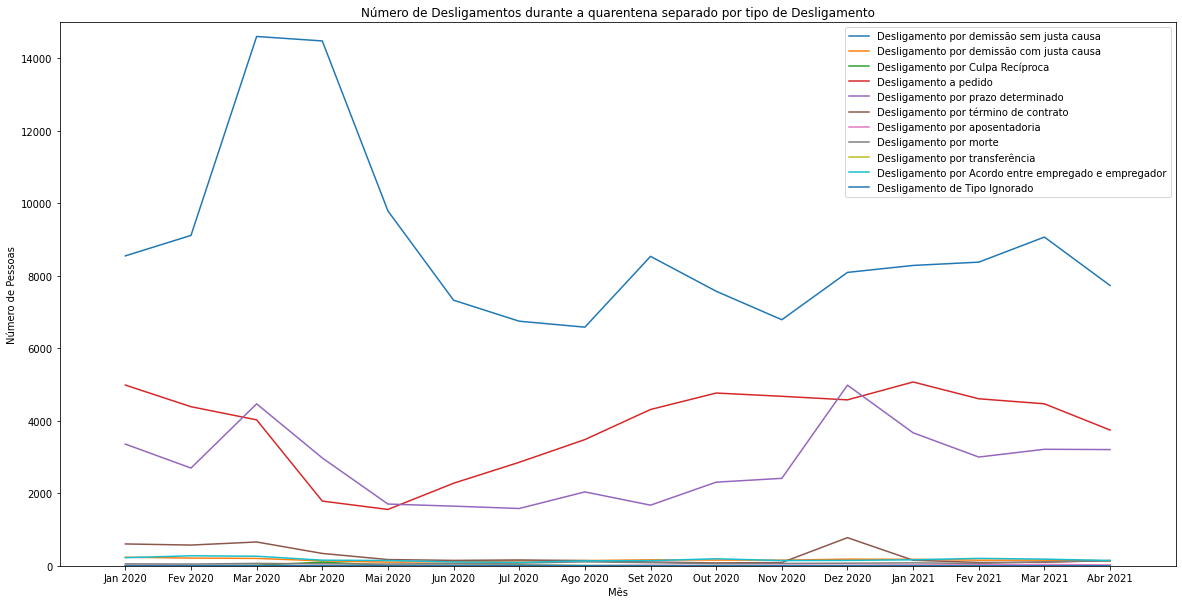

In [29]:
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in quarentenadesl:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,15000])
plt.title("Número de Desligamentos durante a quarentena separado por tipo de Desligamento")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

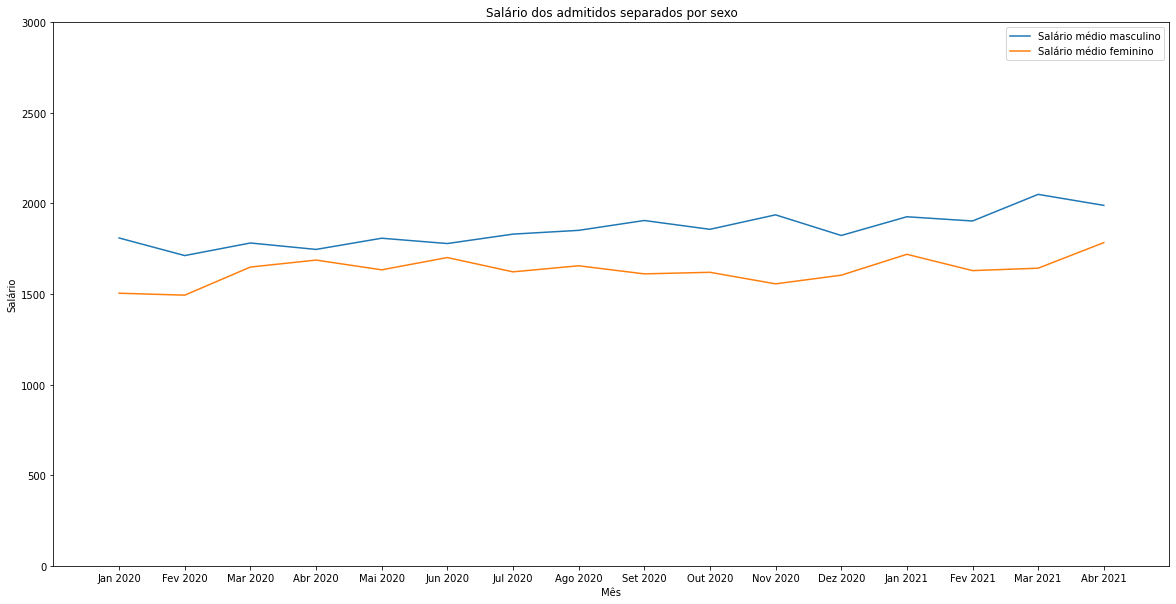

In [37]:
count = -1
mnum=[]
fnum=[]
msal=[]
fsal=[]
mmed=[]
fmed=[]
for periodo in quarentenaadmin:
    mnum.append(0)
    msal.append(0)
    fnum.append(0)
    fsal.append(0)
    count+=1
    for index, row in filtrar(periodo,"sexo","M").iterrows():
        if row["salário"]<100000:
            mnum[count]+=1
            msal[count]+=row["salário"]
    for index, row in filtrar(periodo,"sexo","F").iterrows():
        if row["salário"]<100000:
            fnum[count]+=1
            fsal[count]+=row["salário"]
            
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Salário')
plt.xlabel("Mês")
plt.axis([-1,16,0,3000])
plt.title("Salário dos admitidos separados por sexo")

for i in range(len(mnum)):
    mmed.append(msal[i]/mnum[i])
    fmed.append(fsal[i]/fnum[i])

plt.plot(quarentenanomes, mmed, label="Salário médio masculino")
plt.plot(quarentenanomes, fmed, label="Salário médio feminino")

plt.legend()

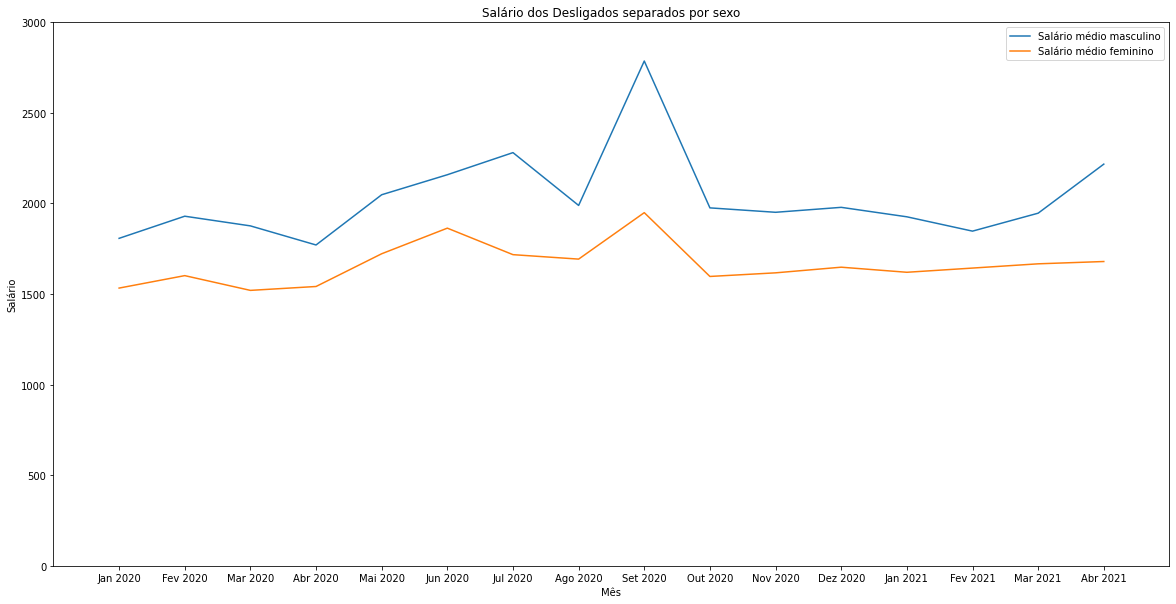

In [42]:
count = -1
mnum=[]
fnum=[]
msal=[]
fsal=[]
mmed=[]
fmed=[]
for periodo in quarentenadesl:
    mnum.append(0)
    msal.append(0)
    fnum.append(0)
    fsal.append(0)
    count+=1
    for index, row in filtrar(periodo,"sexo","M").iterrows():
        if row["salário"]<100000:
            mnum[count]+=1
            msal[count]+=row["salário"]
    for index, row in filtrar(periodo,"sexo","F").iterrows():
        if row["salário"]<100000:
            fnum[count]+=1
            fsal[count]+=row["salário"]
            
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Salário')
plt.xlabel("Mês")
plt.axis([-1,16,0,3000])
plt.title("Salário dos Desligados separados por sexo")

for i in range(len(mnum)):
    mmed.append(msal[i]/mnum[i])
    fmed.append(fsal[i]/fnum[i])

plt.plot(quarentenanomes, mmed, label="Salário médio masculino")
plt.plot(quarentenanomes, fmed, label="Salário médio feminino")

plt.legend()

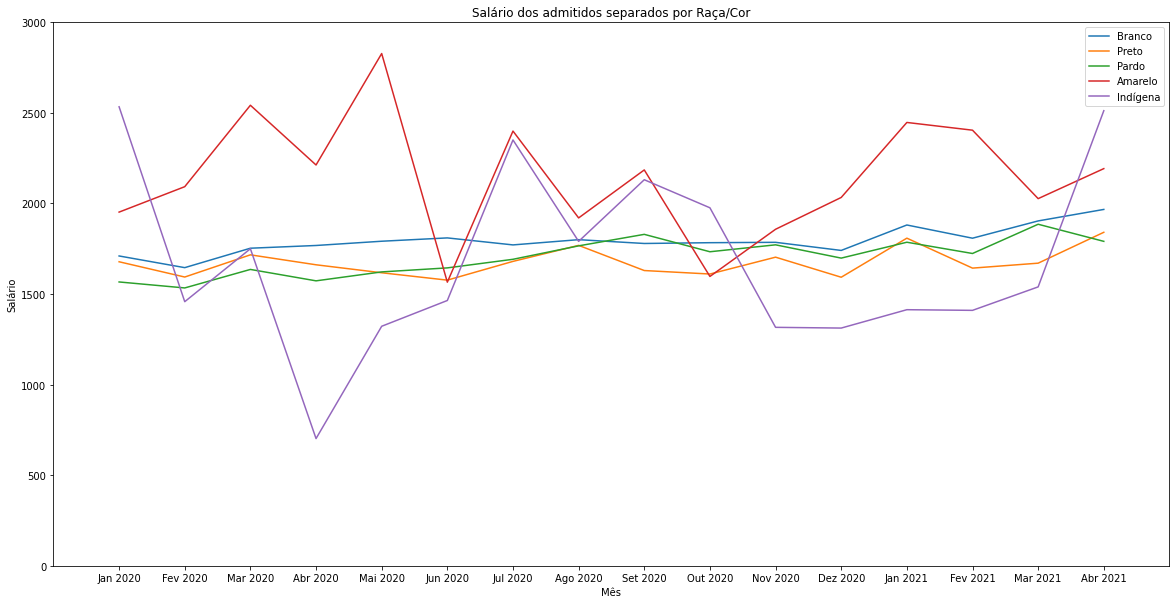

In [41]:
count = -1
anum=[]
bnum=[]
cnum=[]
dnum=[]
enum=[]
asal=[]
bsal=[]
csal=[]
dsal=[]
esal=[]
amed=[]
bmed=[]
cmed=[]
dmed=[]
emed=[]
for periodo in quarentenaadmin:
    anum.append(0)
    asal.append(0)
    bnum.append(0)
    bsal.append(0)
    cnum.append(0)
    csal.append(0)
    dnum.append(0)
    dsal.append(0)
    enum.append(0)
    esal.append(0)
    count+=1
    for index, row in filtrar(periodo,"raçacor","Branca").iterrows():
        if row["salário"]<100000:
            anum[count]+=1
            asal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Preta").iterrows():
        if row["salário"]<100000:
            bnum[count]+=1
            bsal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Parda").iterrows():
        if row["salário"]<100000:
            cnum[count]+=1
            csal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Amarela").iterrows():
        if row["salário"]<100000:
            dnum[count]+=1
            dsal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Indígena").iterrows():
        if row["salário"]<100000:
            enum[count]+=1
            esal[count]+=row["salário"]
            
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Salário')
plt.xlabel("Mês")
plt.axis([-1,16,0,3000])
plt.title("Salário dos admitidos separados por Raça/Cor")

for i in range(len(mnum)):
    amed.append(asal[i]/anum[i])
    bmed.append(bsal[i]/bnum[i])
    cmed.append(csal[i]/cnum[i])
    dmed.append(dsal[i]/dnum[i])
    emed.append(esal[i]/enum[i])

plt.plot(quarentenanomes, amed, label="Branco")
plt.plot(quarentenanomes, bmed, label="Preto")
plt.plot(quarentenanomes, cmed, label="Pardo")
plt.plot(quarentenanomes, dmed, label="Amarelo")
plt.plot(quarentenanomes, emed, label="Indígena")

plt.legend()

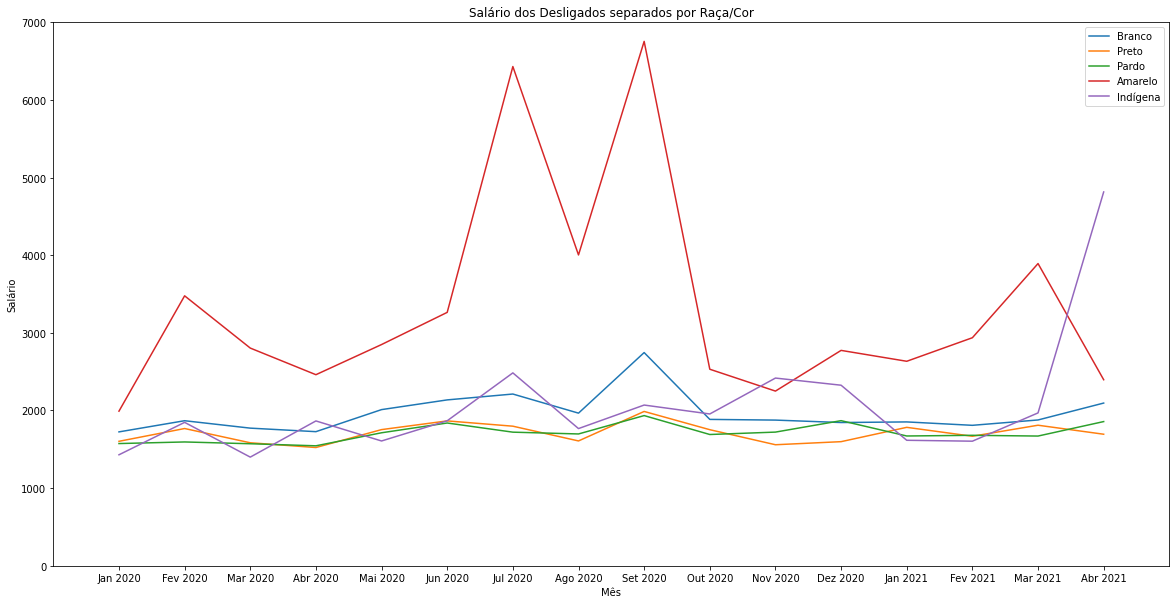

In [47]:
count = -1
anum=[]
bnum=[]
cnum=[]
dnum=[]
enum=[]
asal=[]
bsal=[]
csal=[]
dsal=[]
esal=[]
amed=[]
bmed=[]
cmed=[]
dmed=[]
emed=[]
for periodo in quarentenadesl:
    anum.append(0)
    asal.append(0)
    bnum.append(0)
    bsal.append(0)
    cnum.append(0)
    csal.append(0)
    dnum.append(0)
    dsal.append(0)
    enum.append(0)
    esal.append(0)
    count+=1
    for index, row in filtrar(periodo,"raçacor","Branca").iterrows():
        if row["salário"]<100000:
            anum[count]+=1
            asal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Preta").iterrows():
        if row["salário"]<100000:
            bnum[count]+=1
            bsal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Parda").iterrows():
        if row["salário"]<100000:
            cnum[count]+=1
            csal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Amarela").iterrows():
        if row["salário"]<100000:
            dnum[count]+=1
            dsal[count]+=row["salário"]
    for index, row in filtrar(periodo,"raçacor","Indígena").iterrows():
        if row["salário"]<100000:
            enum[count]+=1
            esal[count]+=row["salário"]
            
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Salário')
plt.xlabel("Mês")
plt.axis([-1,16,0,7000])
plt.title("Salário dos Desligados separados por Raça/Cor")

for i in range(len(mnum)):
    amed.append(asal[i]/anum[i])
    bmed.append(bsal[i]/bnum[i])
    cmed.append(csal[i]/cnum[i])
    dmed.append(dsal[i]/dnum[i])
    emed.append(esal[i]/enum[i])

plt.plot(quarentenanomes, amed, label="Branco")
plt.plot(quarentenanomes, bmed, label="Preto")
plt.plot(quarentenanomes, cmed, label="Pardo")
plt.plot(quarentenanomes, dmed, label="Amarelo")
plt.plot(quarentenanomes, emed, label="Indígena")

plt.legend()

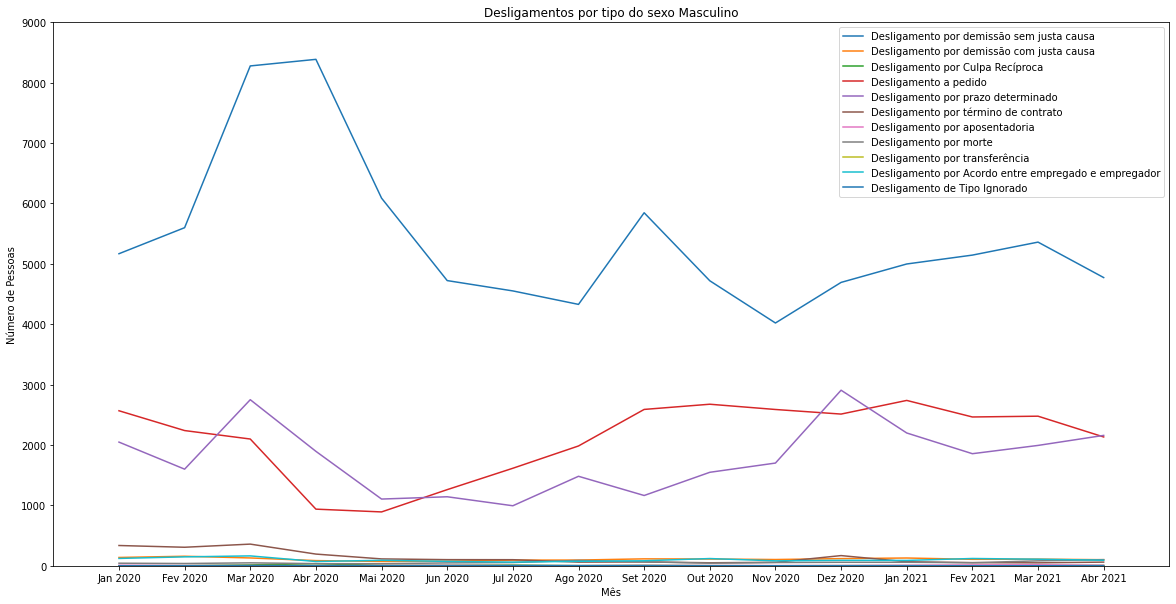

In [53]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"sexo","M"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,9000])
plt.title("Desligamentos por tipo do sexo Masculino")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

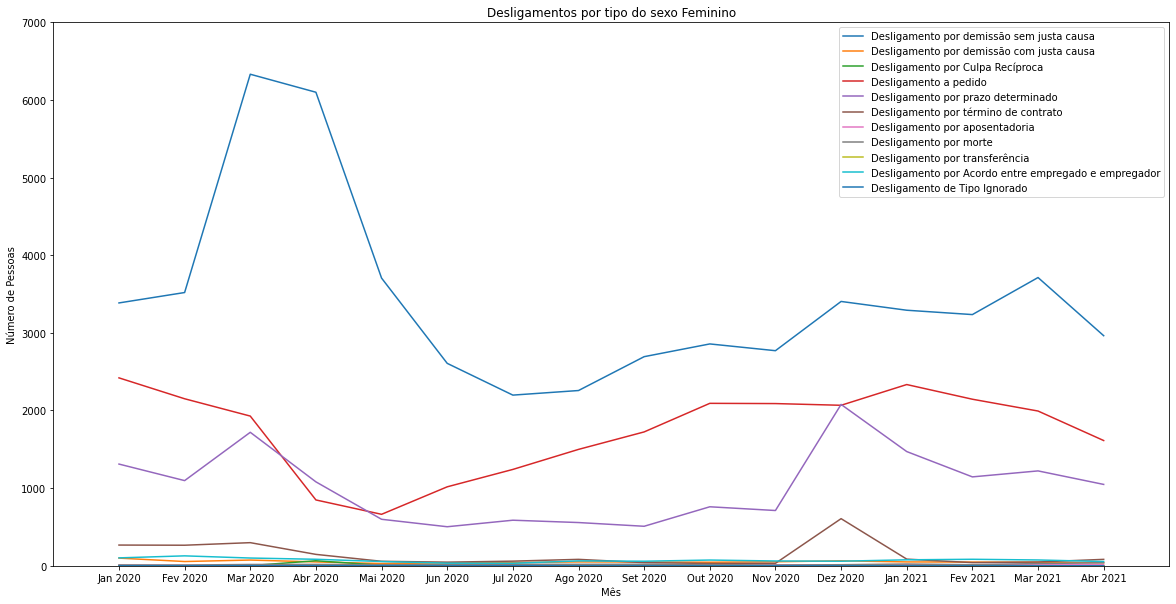

In [59]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"sexo","F"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,7000])
plt.title("Desligamentos por tipo do sexo Feminino")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

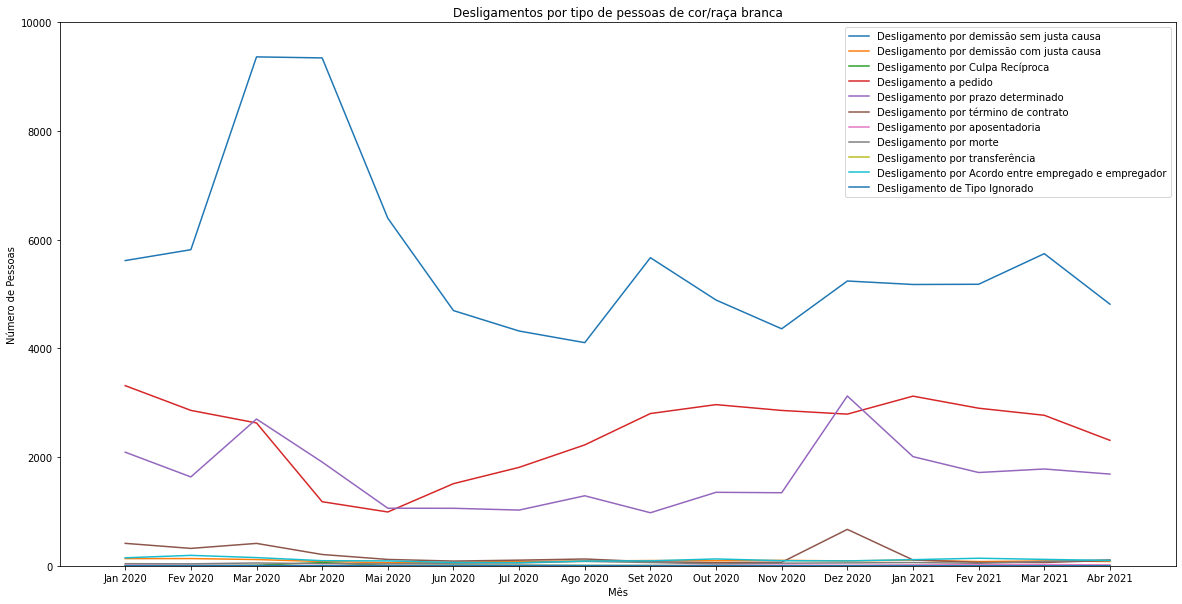

In [63]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"raçacor","Branca"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,10000])
plt.title("Desligamentos por tipo de pessoas de cor/raça branca")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

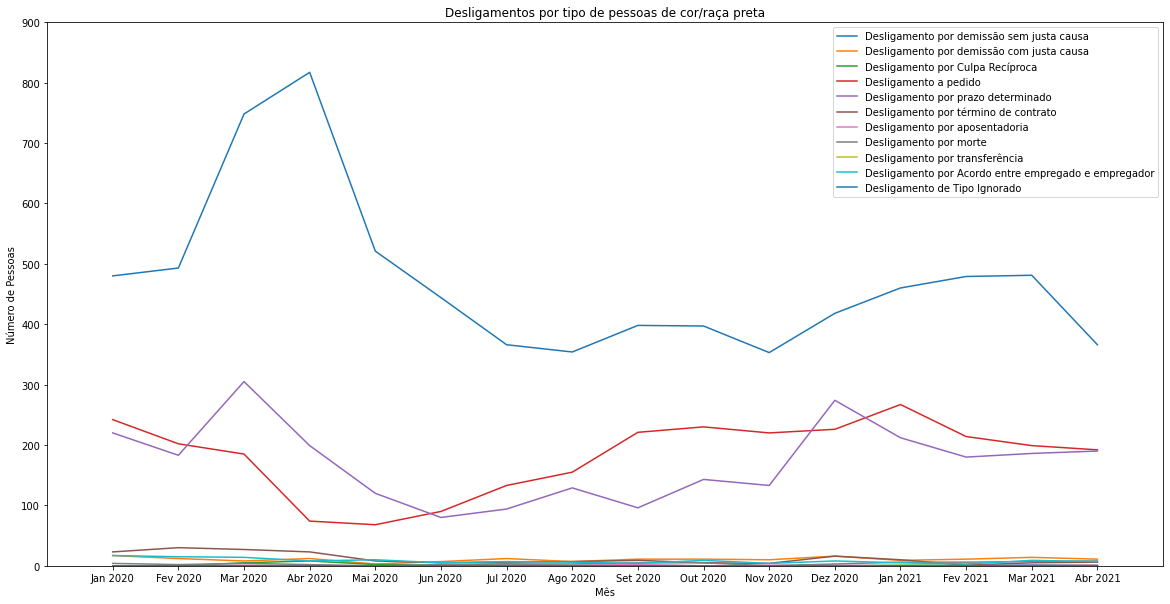

In [67]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"raçacor","Preta"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,900])
plt.title("Desligamentos por tipo de pessoas de cor/raça preta")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

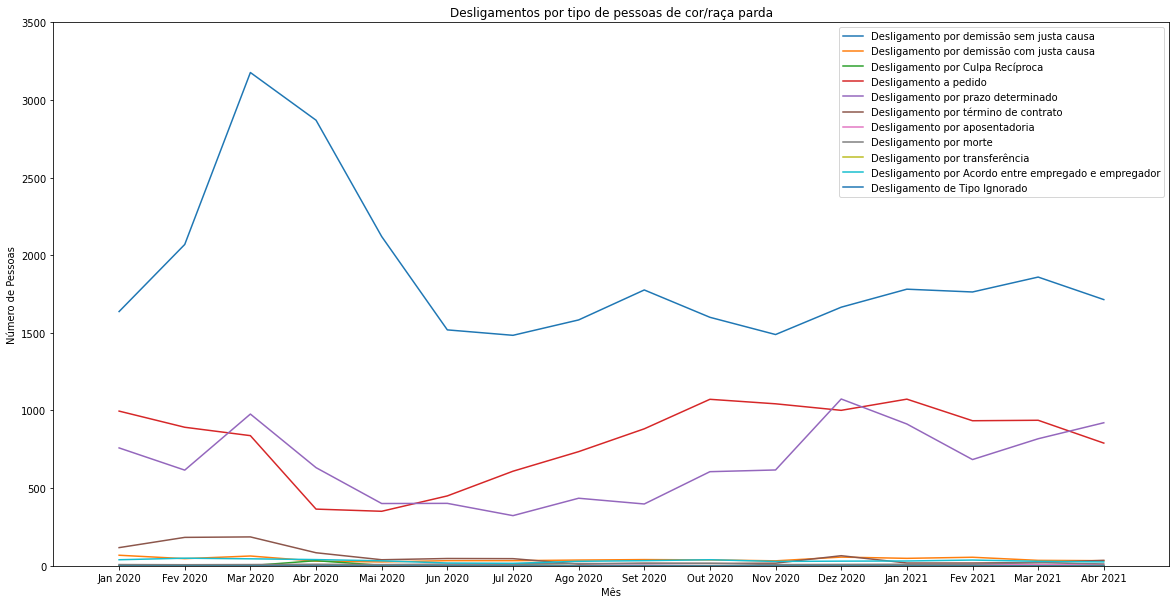

In [72]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"raçacor","Parda"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,3500])
plt.title("Desligamentos por tipo de pessoas de cor/raça parda")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

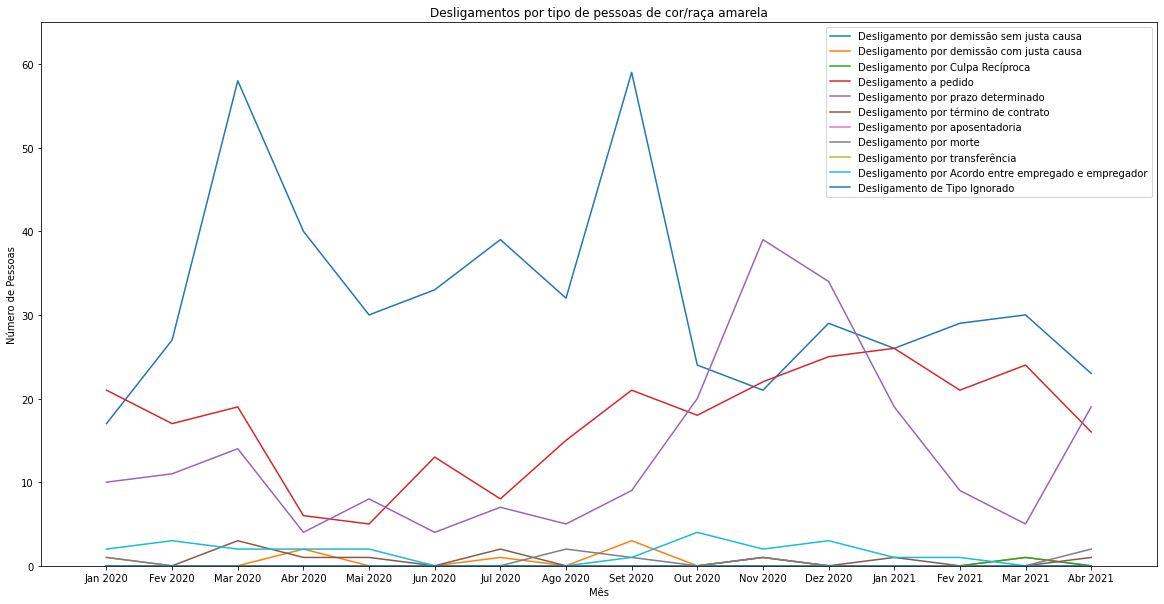

In [76]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"raçacor","Amarela"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,65])
plt.title("Desligamentos por tipo de pessoas de cor/raça amarela")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

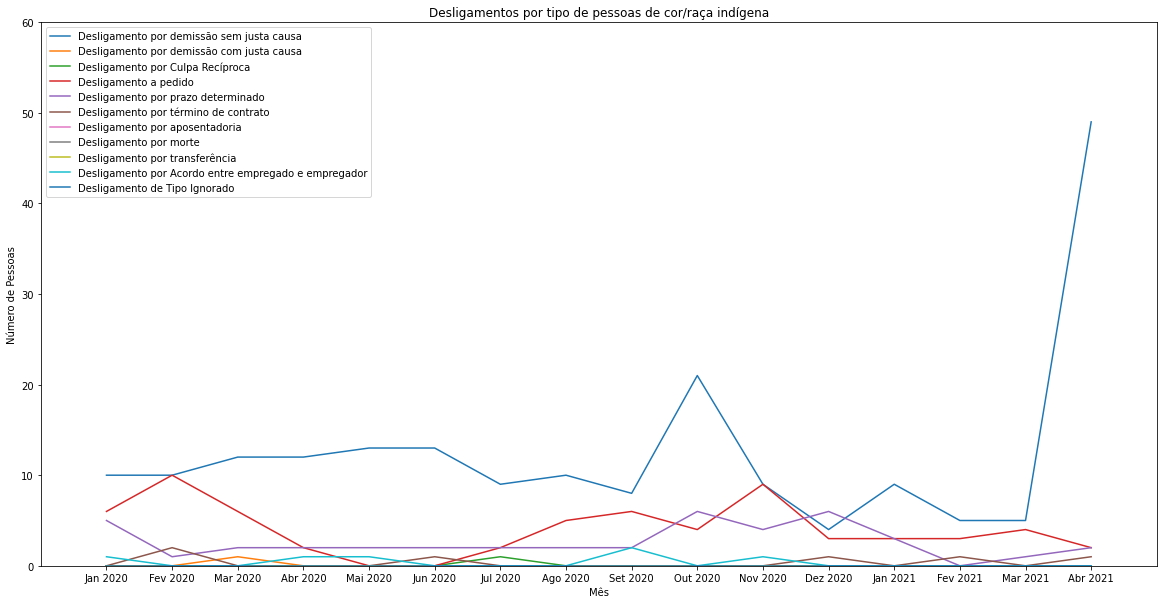

In [79]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(filtrar(mes,"raçacor","Indígena"))
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,60])
plt.title("Desligamentos por tipo de pessoas de cor/raça indígena")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

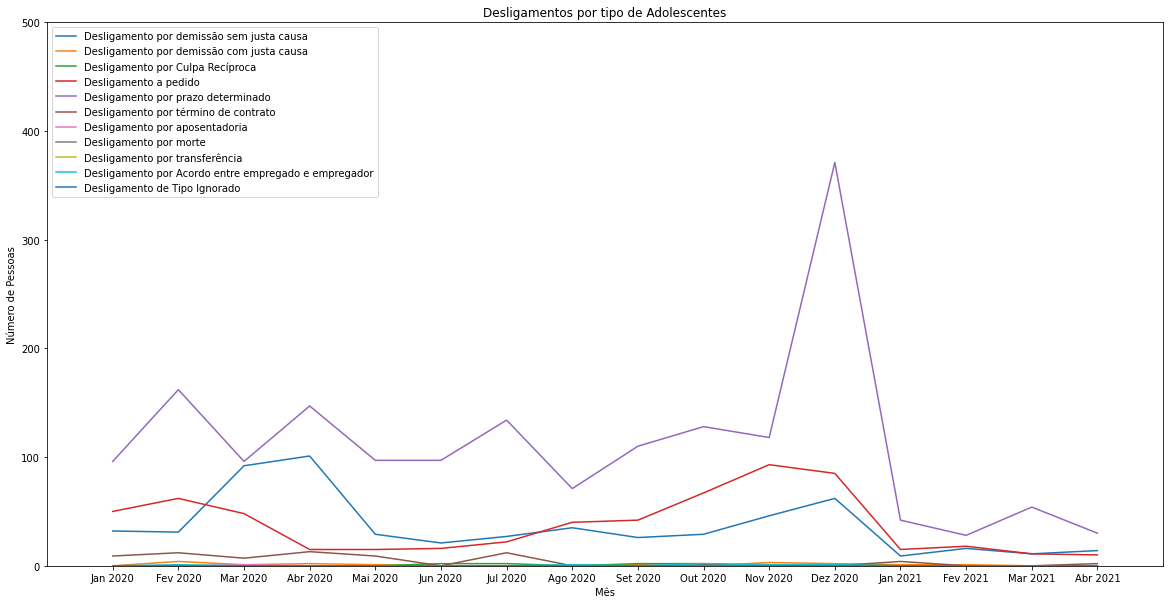

In [91]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(mes.where((mes["idade"])<18).dropna())
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,500])
plt.title("Desligamentos por tipo de Adolescentes")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

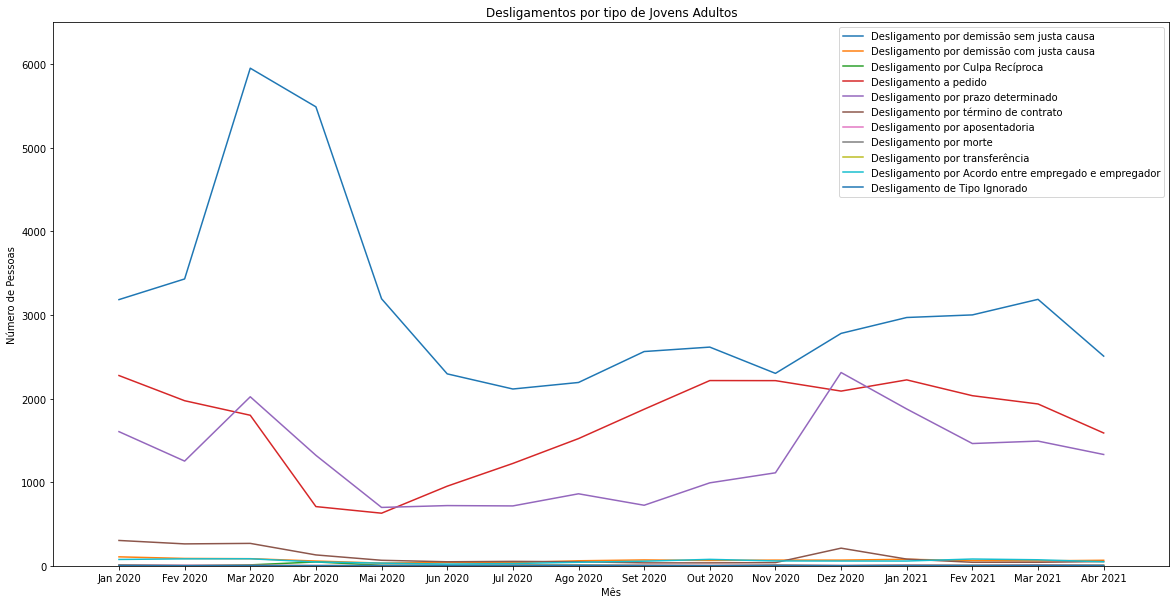

In [93]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(mes.where((mes["idade"])>18).dropna().where((mes["idade"])<30).dropna())
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,6500])
plt.title("Desligamentos por tipo de Jovens Adultos")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

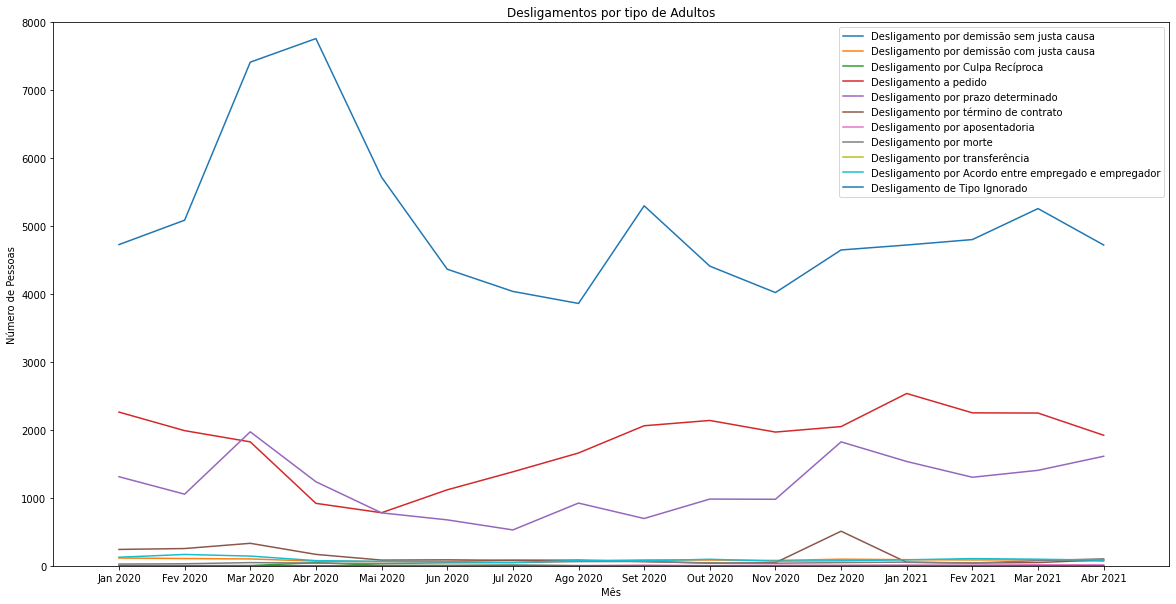

In [95]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(mes.where((mes["idade"])>30).dropna().where((mes["idade"])<60).dropna())
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,8000])
plt.title("Desligamentos por tipo de Adultos")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()

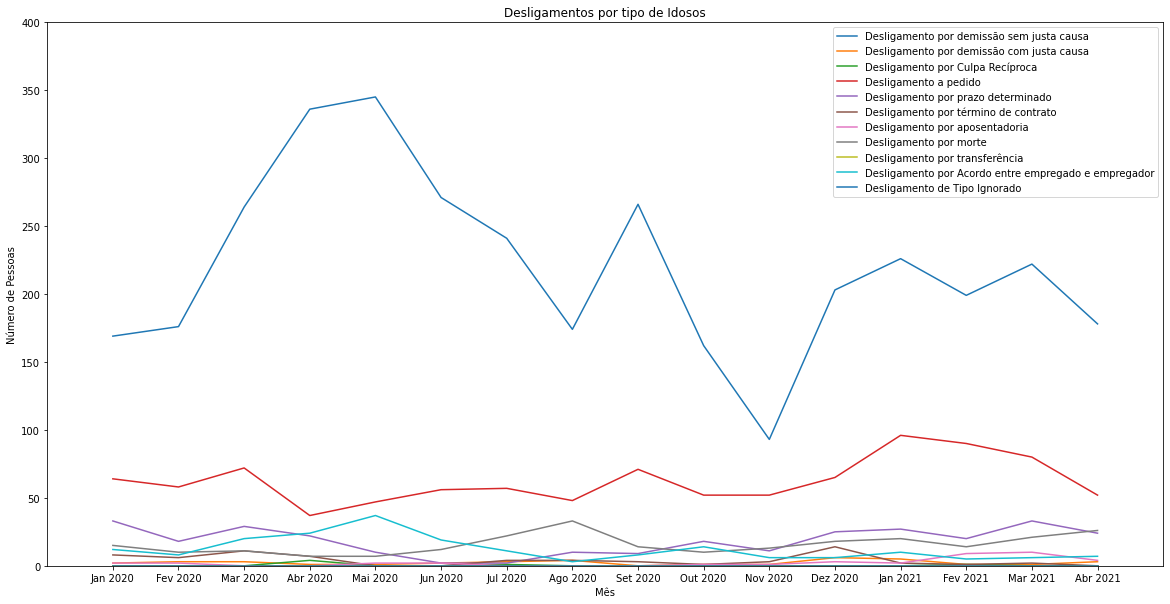

In [99]:
mdesligs = []

for mes in quarentenadesl:
    mdesligs.append(mes.where((mes["idade"])>60).dropna())
    
adesls = []
bdesls = []
cdesls = []
ddesls = []
edesls = []
fdesls = []
gdesls = []
hdesls = []
idesls = []
jdesls = []
kdesls = []
for mes in mdesligs:
    adesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão sem justa causa").index))
    bdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por demissão com justa causa").index))
    cdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Culpa Recíproca").index))
    ddesls.append(len(filtrar(mes,"tipomovimentação","Desligamento a pedido").index))
    edesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por prazo determinado").index))
    fdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por término de contrato").index))
    gdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por aposentadoria").index))
    hdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por morte").index))
    idesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por transferência").index))
    jdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento por Acordo entre empregado e empregador").index))
    kdesls.append(len(filtrar(mes,"tipomovimentação","Desligamento de Tipo Ignorado").index))
fig, (tx1) = plt.subplots(figsize=(20,10))
plt.ylabel('Número de Pessoas')
plt.xlabel("Mês")
plt.axis([-1,16,0,400])
plt.title("Desligamentos por tipo de Idosos")

plt.plot(quarentenanomes, adesls, label="Desligamento por demissão sem justa causa")
plt.plot(quarentenanomes, bdesls, label="Desligamento por demissão com justa causa")
plt.plot(quarentenanomes, cdesls, label="Desligamento por Culpa Recíproca")
plt.plot(quarentenanomes, ddesls, label="Desligamento a pedido")
plt.plot(quarentenanomes, edesls, label="Desligamento por prazo determinado")
plt.plot(quarentenanomes, fdesls, label="Desligamento por término de contrato")
plt.plot(quarentenanomes, gdesls, label="Desligamento por aposentadoria")
plt.plot(quarentenanomes, hdesls, label="Desligamento por morte")
plt.plot(quarentenanomes, idesls, label="Desligamento por transferência")
plt.plot(quarentenanomes, jdesls, label="Desligamento por Acordo entre empregado e empregador")
plt.plot(quarentenanomes, kdesls, label="Desligamento de Tipo Ignorado")

plt.legend()